# Bem vindo ao notebook de análise dos dados do spotify 🤘🎶🎙️

### Importando os pacotes necessários

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Fazendo a leitura inicial dos dados

In [3]:
data = pd.read_csv('songs_normalize.csv')

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Hipótese: As músicas mais dançantes são mais populares

<AxesSubplot:>

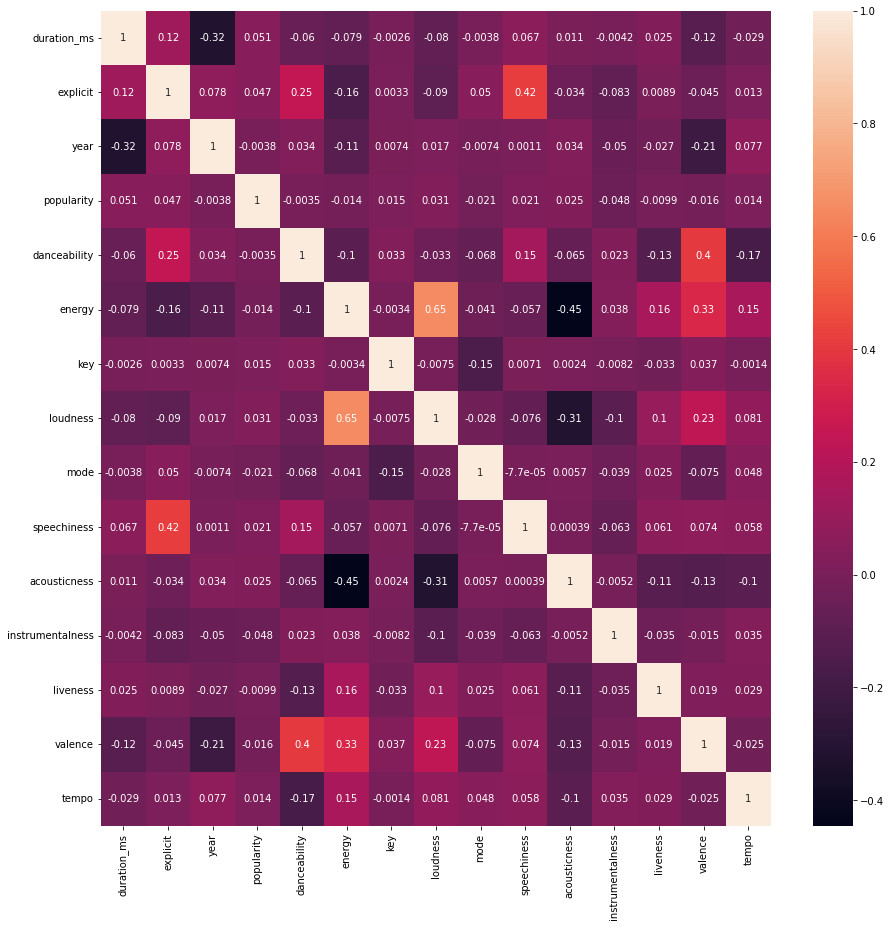

In [4]:
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(data.corr(), annot=True)

Pelo mapa de calor, observa-se que não existe uma relação entre a popularidade e qualquer uma das outras variáveis. Existe, porém, uma relação entre as músicas explícitas e que possuem voz, o que faz muito sentido, já que uma música explícita (considerada ofensiva ou inapropriada para crianças) precisa de palavras para ser categorizada dessa forma.

Também notável que existe uma relação entre a dançabilidade e a valência (categorizadas como músicas positivas, como músicas felizes, alegres, entre outros) o que também faz sentido.

### Hipótese: Os gêneros mais populares variam com o passar dos anos

In [6]:
# separando os gêneros
genres = list(data.genre.str.split(", "))

# pegando o maior número de gêneros
max_number_of_genres = max([len(genre) for genre in genres])

max_number_of_genres

4

In [8]:
# Função para separar o gênero das músicas
# A função seleciona a tabela gênero, a transforma em um string, e faz a separação usando a vírgula como separador
# O parâmetro 'expand' faz com que o resultado da separação seja dividido em colunas
# Caso não exista um valor para a coluna, a coluna é preenchida com 'None'
# Feita a separação em 4 colunas pelo fato de o maior número de gêneros ser 4
def split_genres(df):
    df[["genre_1", "genre_2", "genre_3", "genre_4"]] = df.genre.str.split(", ",expand=True)
    return df

# Chamando a função e salvando o resultado em um novo dataframe
data_with_splitted_genres = (data.pipe(split_genres))

# Removendo a coluna 'genre' que não será mais utilizada
new_data = data_with_splitted_genres.drop(columns='genre')

# Visualizando as primeiras linhas do novo dataframe
new_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_1,genre_2,genre_3,genre_4
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,None,None,None
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,None,None
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,country,None,None
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,None,None
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,None,None,None


genre
Dance/Electronic     [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Folk/Acoustic        [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
R&B                  [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
World/Traditional    [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
blues                [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
classical            [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
country              [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
easy listening       [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
hip hop              [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
jazz                 [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
latin                [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
metal                [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
pop                  [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
rock                 [[AxesSubplot(0.125,0.749828;0.352273x0.130172...


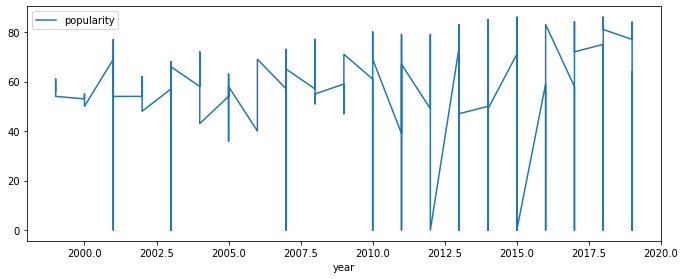

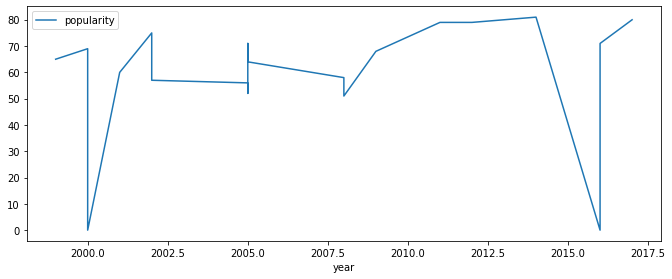

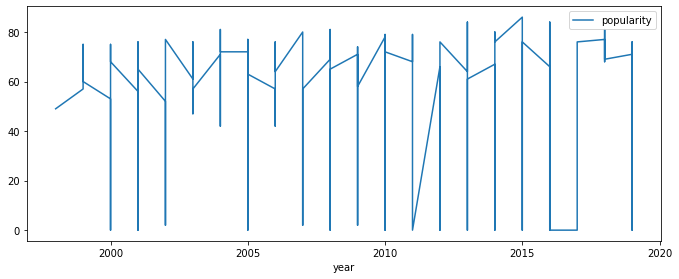

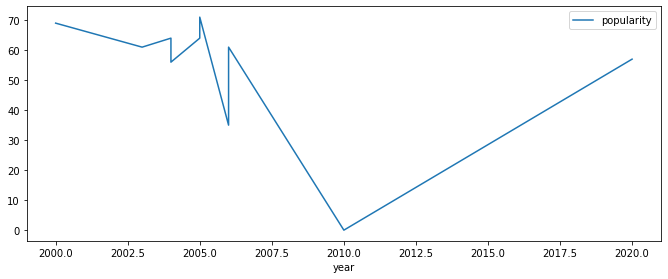

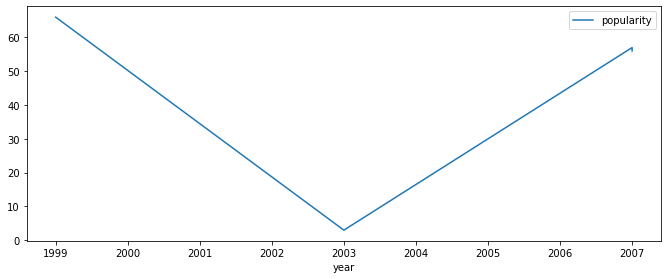

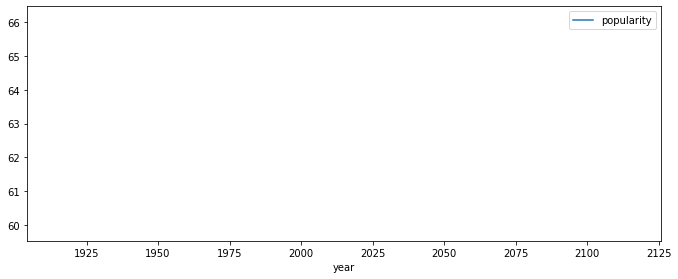

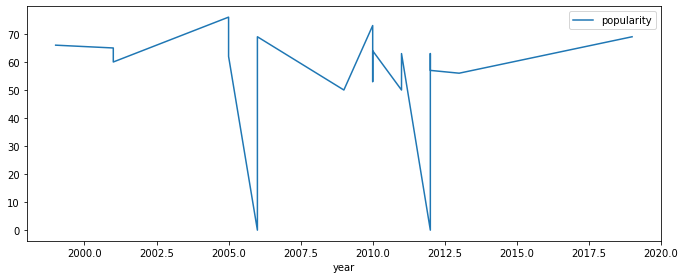

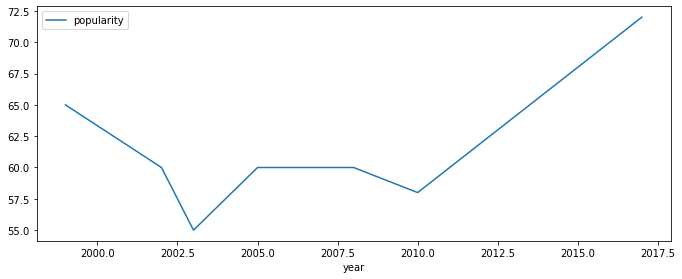

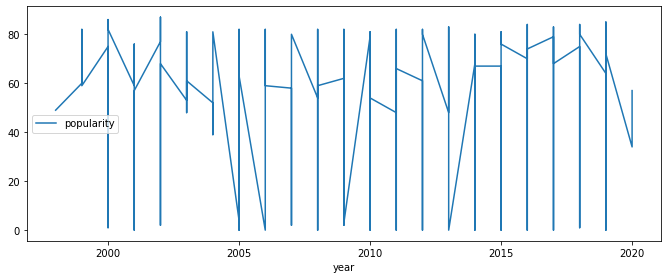

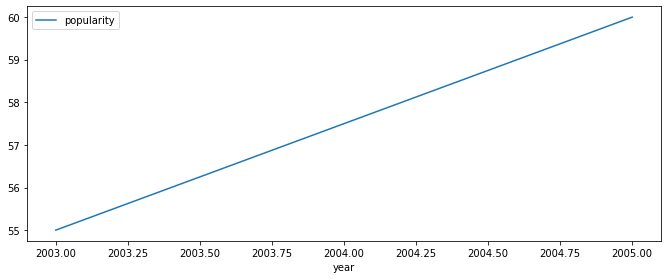

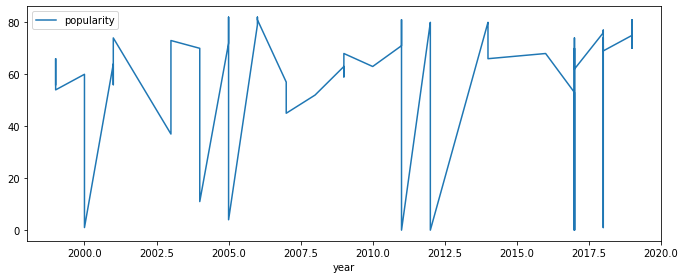

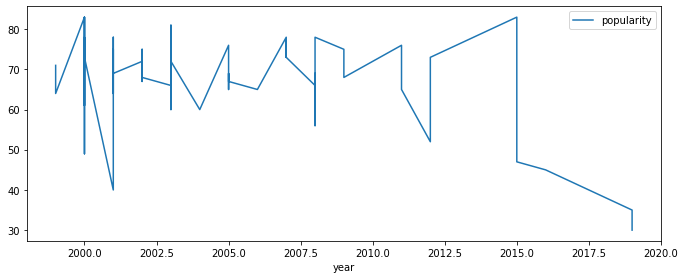

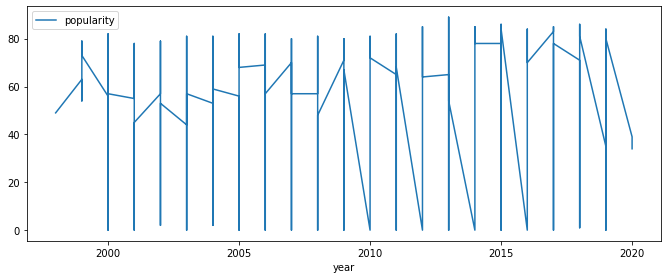

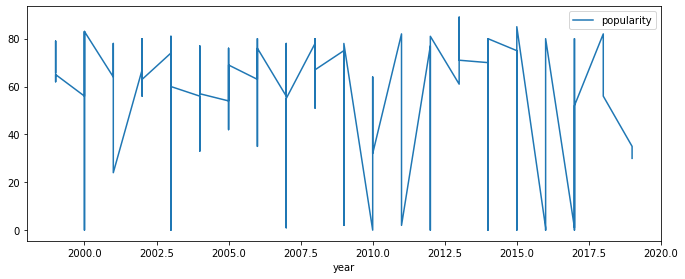

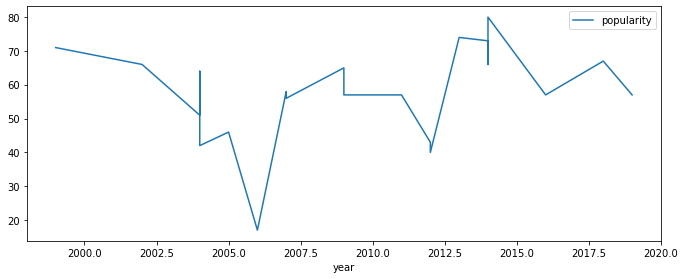

In [9]:
# Criando novos dataframes com apenas uma coluna de gênero

# Criando lista para armazenar os dataframes temporariamente
df_list = list()

for index in range(1, 5):
    new_df = new_data[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', f'genre_{index}']]
    
    # Renomeando coluna gênero
    new_df = new_df.rename(columns={f'genre_{index}': 'genre'})
    
    # Removendo valores nulos
    new_df = new_df[new_df['genre'].notnull()]
    
    # Adicionando os dataframes na lista
    df_list.append(new_df)

# Unindo os dataframes
united_df = pd.concat(df_list)

united_df.sort_values('year').groupby('genre').plot.line(x='year', y='popularity', subplots=True, layout=(5,2), figsize=(25,25))

0

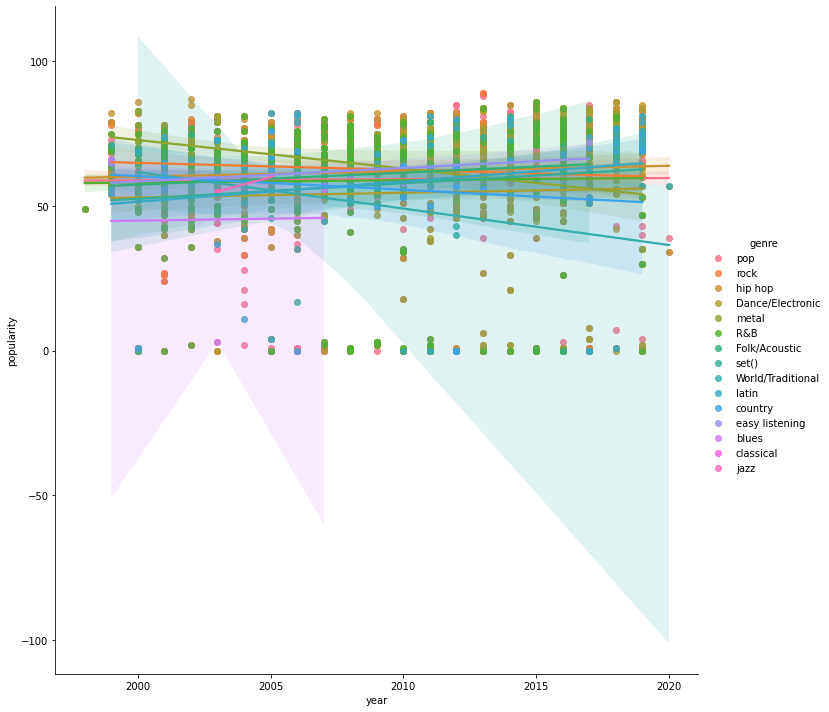

In [16]:
sns.lmplot(x='year', y='popularity', data=united_df, hue='genre', height=10)